In [65]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d

Ejercicio 1.

$$\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = & -x   \\
\end{eqnarray*}$$

In [2]:
#Obtenemos los eigenvalores de la matriz A
A = np.array([[0,1],[-1,0]])
print(A)
eigvalsA, eigvecsA= la.eig(A)
print("Eigenvalores:", eigvalsA)
#obtenemos la traza de la matriz 
tr = np.trace(A)
print("La traza de la matriz es:",tr)

[[ 0  1]
 [-1  0]]
Eigenvalores: [0.+1.j 0.-1.j]
La traza de la matriz es: 0


In [3]:
#Resolvemos el sistema homogéneo 
B = np.zeros((2,1))
sh = la.solve(A,B)
print("la solución es:x = ", sh[0], "y = ",sh[1])

la solución es:x =  [-0.] y =  [0.]


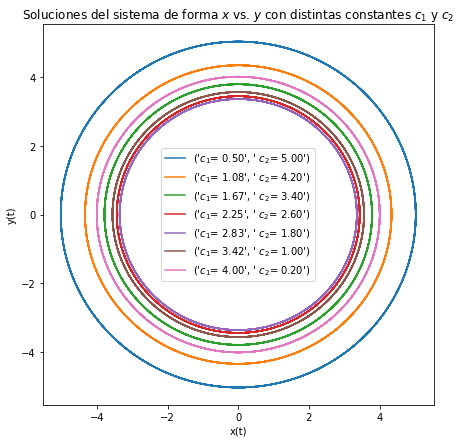

In [22]:
 #graficamos las soluciones 
#c1 y c2 son las constantes 

def x(t,c1,c2):
  t0=np.zeros((1000,))
  t0=t
  r=[c1*np.cos(t0)+c2*np.sin(t0),-c1*np.sin(t0)+c2*np.cos(t0)]
  return r

# Creamos suficientes puntos de tiempo t y constantes arbitrarias c_1 y c_2
t=np.linspace(0,50,1000)
c1=list(np.linspace(0.5,4,7))
c2=list(np.linspace(5,0.2,7))

#Graficamos las soluciones haciendo variar a las constantes arbitrarias
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema de forma $x$ vs. $y$ con distintas constantes $c_1$ y $c_2$')
plt.legend()
plt.show()

Ejercicio 2.

$$\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = &  x  \\
\end{eqnarray*}$$

Se puede escribir como
$$
\frac{dx}{dt}= 1 \ y\ + 0 \ x\\
\frac{dy}{dt}=  0 \ y+ 1 \ x \\
$$
De modo que la operacion matricial nos queda
$$
\frac{d\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
y\\
x
\end{bmatrix}=
\begin{bmatrix}
1 & 0\\
0 & 1 \\
\end{bmatrix} 
\begin{bmatrix}
y\\
x
\end{bmatrix}
$$

In [26]:
#Obtenemos los eigenvalores de la matriz B
B=np.array([[1,0],[0,1]])
print('La matriz B es:')
print(B)
eigvalsB, eigenvecsB=la.eig(B)
print('Los eigenvectores de la matriz B es:')
print(eigenvecsB)
print('Los eigenvalores de la matriz B es:')
print(eigvalsB)

#obtenemos la traza de la matriz 
tr = np.trace(B)
print("La traza de la matriz es:",tr)

La matriz B es:
[[1 0]
 [0 1]]
Los eigenvectores de la matriz B es:
[[1. 0.]
 [0. 1.]]
Los eigenvalores de la matriz B es:
[1.+0.j 1.+0.j]
La traza de la matriz es: 2


In [28]:
DetB=la.det(B)
print('El determinante es')
print(DetB)
print()
print('Delta es =')
print((tr)**2-4*(DetB))
print()

El determinante es
1.0

Delta es =
0.0



Podemos ubicar a $\lambda=\mu=1$.Tiene como punto critico un nodo inestable ya que ambos son iguales y mayores que 0.\
La solucíon se puede escribir entonces

$$x(t)=c_1exp(\lambda t)v_1+c_2exp(\mu t)v_2$$
Donde $v_1=(1,0)$ y $v_2=(0,1)$\

$\lambda = 1$ y $\mu=1$
$$x(t)=c_1 e^t(1,0)+c_2 e^{t} (0,1)$$$$x(t)=(c_1 e^t ,c_2 e^{t})$$

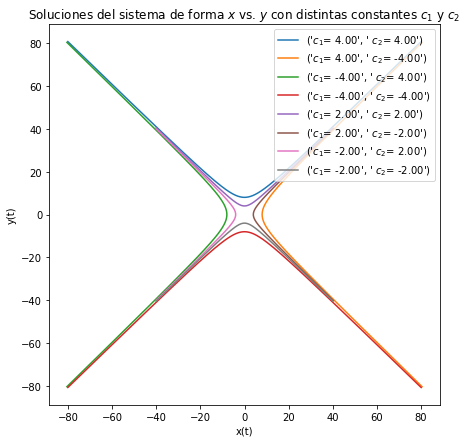

In [30]:
# Definimos la función con la solución del sistema, como se ve arriba
def x1(t,c1,c2):
  r=[c1*np.exp(t)-c2*np.exp(-t), c1*np.exp(t)+c2*np.exp(-t)]
  return r

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase
t=np.linspace(-3,3,500)

c1=[4,4,-4,-4,2,2,-2,-2]
c2=[4,-4,4,-4,2,-2,2,-2]

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x1(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema de forma $x$ vs. $y$ con distintas constantes $c_1$ y $c_2$')
plt.legend()
plt.show()

Ejercicio 3.

$$\begin{eqnarray*}
\frac{d^2 x}{d t^2} + \omega_0^2 x & = & 0, \ \omega_0 > 0  \\
\end{eqnarray*}$$

Hacemos

$$\begin{eqnarray*}
\frac{d x}{d t} = y \\
\frac{d y}{dt} = -\omega_0^2 x  \\
\end{eqnarray*}$$
Los eigenvalores son de la forma$$\begin{equation*}
\lambda =  \pm w_0i
\end{equation*}$$

Por lo que las soluciones van a ser senos y cosenos.

In [31]:
# Definimos una constante arbitraria w0 y encontramos los eigenvalores de la matriz de coeficientes del sistema
w0=5
C=np.array([[0,1],[w0,0]])
b=np.zeros((2,1))
pcr=la.solve(C,b)
print('x = ',pcr[0],'\n','y = ',pcr[1])

x =  [0.] 
 y =  [0.]


Entonces concluimos que el punto $(x,y)=(0,0)$ es un punto crítico de tipo Centro.\
La solución del sistema se ve entonces:

$$ \begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} c_1\cos{(\omega_0t)}+c_2\sin{(\omega_0t)} \\ -c_1\omega_0\sin{(\omega_0t)}+c_2\omega_0\cos{(\omega_0t)} \end{pmatrix} $$

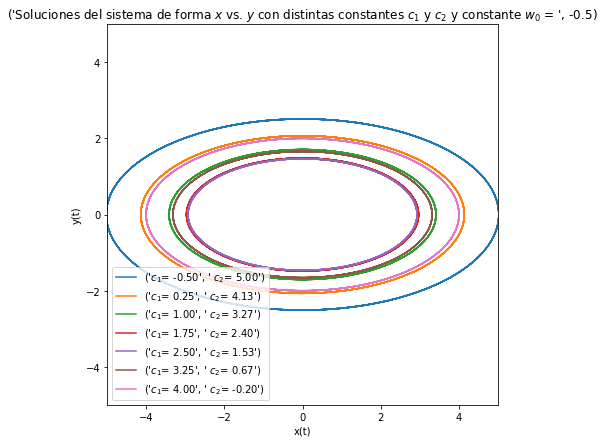

In [37]:
# Definimos la función con la solución del sistema, como se ve arriba
def x(t,w0,c1,c2):
  r=[c1*np.cos(w0*t)+c2*np.sin(w0*t),-c1*w0*np.sin(w0*t)+c2*w0*np.cos(w0*t)]
  return r

# Definimos los puntos t de tiempo sobre los cuales obtener valores de la solución y 
# declaramos constantes arbitrarias para graficar soluciones en espacio fase
w0=-0.5
t=np.linspace(-10,50,1000)
c1=list(np.linspace(-0.5,4,7))
c2=list(np.linspace(5,-0.2,7))

# Graficamos el espacio fase de las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,w0,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.title(('Soluciones del sistema de forma $x$ vs. $y$ con distintas constantes $c_1$ y $c_2$ y constante $w_0$ = ',w0))
plt.legend()
plt.show()

Ejercicio 4.

$$\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\frac{d y}{dt } & = &  2 z  \\
\frac{d z}{dt } & = &  - 2 y  \\
\end{eqnarray*}$$
De estas tres ecuaciones podemos ver que$$\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\end{eqnarray*}$$Es independiente a las otras dos

In [42]:
# Obtenemos por separado los eigenvalores de la matriz del sistema dependiente de yz del sistema xyz
C = np.array([[-2,0,0],[0,0,2],[0,-2,0]])
C1= np.array([[0,-2],[2,0]])
eigenval, eigenvec = la.eig(C)
print(eigenval)
eigenval, eigenvec = la.eig(C1)
print(eigenval)
tr = np.trace(C)
tr1 = np.trace(C1)
print("La traza de la matriz es:",tr)
print("La traza de la matriz es:",tr1)

[ 0.+2.j  0.-2.j -2.+0.j]
[0.+2.j 0.-2.j]
La traza de la matriz es: -2
La traza de la matriz es: 0


In [43]:
# Resolvemos el sistema homogéneo para encontrar puntos críticos
c=np.zeros((3,1))
pc=la.solve(C,c)
pc

array([[-0.],
       [-0.],
       [ 0.]])

La solución se puede escribir como

$$\begin{equation*}
x(t) = c_1 \exp(-2t) ,c_2 cos(2 t) + c_3 sen(2t), -c_2sen(2t) + c_3cos(2t)
\end{equation*}$$

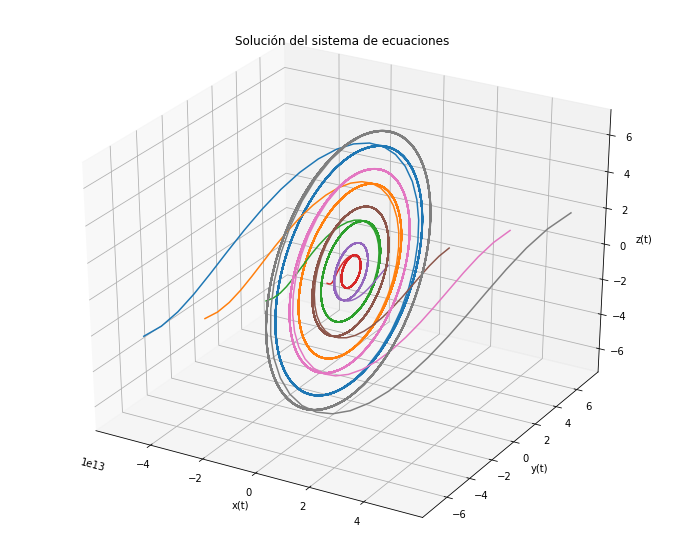

In [44]:
#Defininos la función 
def f(t,c1,c2,c3):
  s=[c1*np.exp(-2*t), c2*np.cos(2*t)+c3*np.sin(2*t), -c2*np.sin(2*t)+c3*np.cos(2*t)]
  return s

t = np.linspace( -15, 80, 1000 )
#Constantes 
c1 = np.linspace( -5,5,8 )
c2 = np.linspace(2,-1,8 )
c3 = np.linspace(-6,7,8)

plt.figure(figsize = ( 12, 10 ))
ax = plt.axes( projection= "3d" )

for a,b,c in zip(c1,c2,c3):
  v = f(t,a,b,c)
  s = np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])

plt.xlabel("x(t)")
plt.ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solución del sistema de ecuaciones")
plt.grid()
plt.show()

Ejercicio 5.

$$\begin{eqnarray*}
\frac{d x}{d t} & = & - x + z  \\
\frac{d y}{dt } & = &  3 y  \\
\frac{d z}{dt } & = &  - x - z \\
\end{eqnarray*}$$
Podemos ver que

$$\begin{eqnarray*}
\frac{d y}{dt } =  3 y  \\
\end{eqnarray*}$$
Es independiente a las otras dos

In [45]:
#Hacemos el arreglo 
A = np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
eigvalsA, eigvecsA= la.eig(A)
print("Los eigenvalores de A son:",eigvalsA )
B = np.array([[-1,1],[-1,-1]])
eigvalsA, eigvecsA= la.eig(B)
print("Los eigenvalores de B son:",eigvalsA )
trA = np.trace(A)
trB = np.trace(B)
print("La traza de la matriz A es:",trA)
print("La traza de la matriz B es:",trB)

Los eigenvalores de A son: [-1.+1.j -1.-1.j  3.+0.j]
Los eigenvalores de B son: [-1.+1.j -1.-1.j]
La traza de la matriz A es: 1
La traza de la matriz B es: -2


In [47]:
# Resolvemos el sistema homogéneo para encontrar puntos críticos
b=np.zeros((3,1))
pc=la.solve(A,b)
print('Los puntos críticos son:')
print(pc)

Los puntos críticos son:
[[-0.]
 [ 0.]
 [-0.]]


Por lo tanto, podemos concluir que el punto crítico del sistema de ecuaciones es un foco espiral estable.

La solución del sistema viene dada por:

$$ \begin{pmatrix} x\\ y\\ z \end{pmatrix}=\begin{pmatrix} e^{-t} (c_1\sin{t}+c_3\cos{t})\\ c_2e^{3t} \\ e^{-t}(c_3\sin{t}-c_1\cos{t}) \end{pmatrix} $$
Graficaremos el espacio fase para distintos valores de las constantes $c_k;\; k=1,2,3$

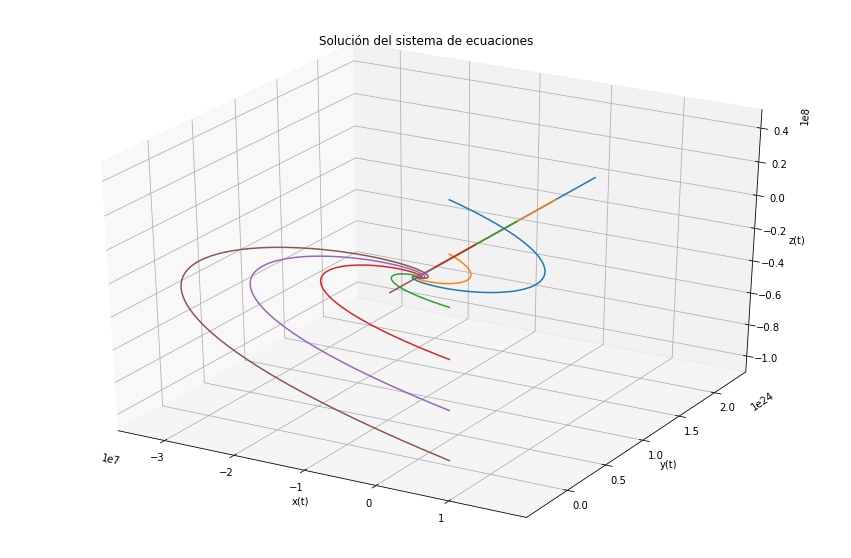

In [48]:
#Función
def f(t,c1,c2,c3):
  sol = [np.exp(-t)*(c1*np.cos(t)+c3*np.sin(t)),c2*np.exp(3*t) ,np.exp(-t)*(c3*np.cos(t)-c1*np.sin(t)) ]
  return sol

t=np.linspace(-16,18,1000)
#Constantes
c1=list(np.linspace(-2,3,6))
c2=list(np.linspace(8,-3,7))
c3=list(np.linspace(-5,15,7))

plt.figure(figsize = ( 15, 10 ))
ax = plt.axes( projection= "3d" )
for a,b,c in zip(c1,c2,c3):
  p = f(t,a,b,c)
  s = np.array(p)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
 
plt.xlabel("x(t)")
plt.ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.title("Solución del sistema de ecuaciones")
plt.grid()
plt.show()


Resuelva los siguientes problemas de valor inicial\
Ejercicio 6:

$$\begin{eqnarray*}
\frac{d x}{d t} & = & - x  \\
\frac{d y}{dt } & = &  x + 2 y  \\
x(0) = 0, & & y(0) = 3
\end{eqnarray*}$$

Podemos ver el sistema como una matriz que sería:

$$\begin{pmatrix} -1 & 0 \\ 1 & 2 \end{pmatrix}$$
Que lo podemos ver como el siguiente sistema:$$ \frac{d}{dt}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} -1 & 0 \\ 1 & 2 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}=\begin{pmatrix} -x \\ x+2y \end{pmatrix} $$En donde lo que obtendremos será:$$\begin{pmatrix} -x \\ x+2y \end{pmatrix}$$

In [50]:
L=np.array([[-1,0],[1,2]])

print('La matriz en cuestion L es ')
print(L)
print()

eigvalL, eigenvecL=la.eig(L)
print('Los eigenvalores son')
print(eigvalL)
print()
print('Los eigenvectores correspondientes son')
print(eigenvecL)
trL = np.trace(L)
print("La traza de la matriz A es:",trL)

La matriz en cuestion L es 
[[-1  0]
 [ 1  2]]

Los eigenvalores son
[ 2.+0.j -1.+0.j]

Los eigenvectores correspondientes son
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]
La traza de la matriz A es: 1


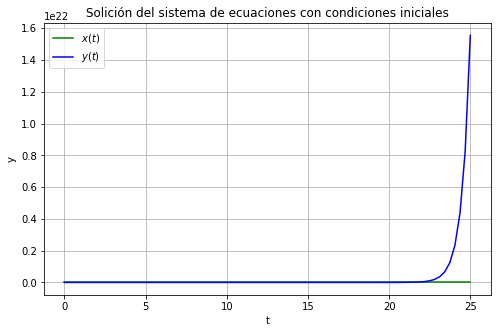

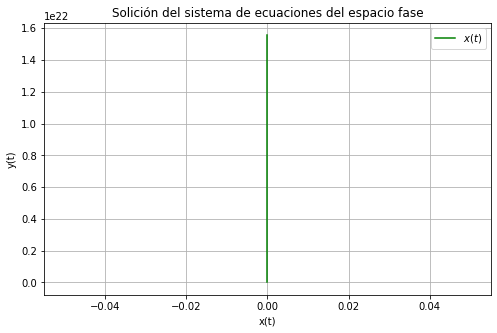

In [51]:
#Definimos a nuestra función 
def f(y, t):
  x, p = y
  return [-x, x+2*p]

#Condiciones iniciales 
y_0=[0,3] 
t=np.linspace(0,25,80)

# Graficamos las soluciones
plt.figure(figsize=(8,5))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'green',label='$x(t)$')
plt.plot(t,y[0:,1],'blue',label='$y(t)$')
plt.title('Solición del sistema de ecuaciones con condiciones iniciales')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Espacio fase 
plt.figure(figsize=(8,5))
plt.plot(y[0:,0],y[:,1],'green',label='$x(t)$')
plt.legend(loc= "best")
plt.title('Solición del sistema de ecuaciones del espacio fase')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()


Ejercicio 7:

$$\begin{eqnarray*}
\frac{d x}{d t} & = & 2 x + y  \\
\frac{d y}{dt } & = &  x +  y  \\
x(1) = 1, & & y(1) = 1
\end{eqnarray*}$$
En este caso siendo 
$\vec{x}=(x,y)$\
$$\frac{d \vec{x} }{dt}=\frac{d}{dt}
\begin{bmatrix}
x \\y 
\end{bmatrix}
=A
\begin{bmatrix}
x \\
y 
\end{bmatrix}
=\begin{bmatrix}
2 & 1  \\
1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}
$$
Donde la solución es:$$\begin{pmatrix} 2x+y \\ x+y \end{pmatrix}$$

In [57]:
#Hacemos el arreglo 
A = np.array([[2,1],[1,1]])
eigvalsA, eigvecsA= la.eig(A)
print('Los eigenvalores son')
print(eigvalsA)
print()
print('Los eigenvectores correspondientes son')
print(eigvecsA)

trA = np.trace(A)
print("La traza de la matriz A es:",trA)
DetA=la.det(A)
print('El determinante es')
print(DetA)
print()
print('Delta es =')
print((trA)**2-4*(DetA))
print()

Los eigenvalores son
[2.61803399+0.j 0.38196601+0.j]

Los eigenvectores correspondientes son
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]
La traza de la matriz A es: 3
El determinante es
1.0

Delta es =
5.0



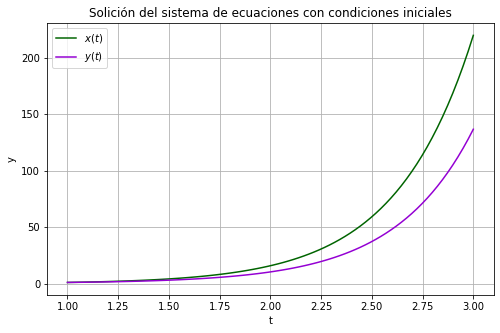

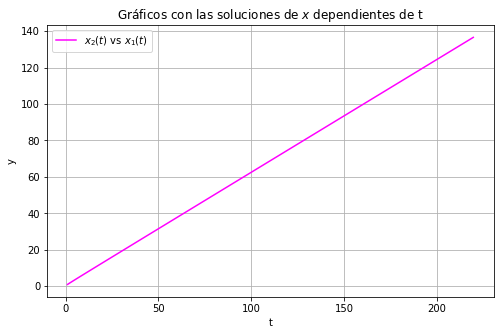

In [55]:
#Definimos la función 
def f(y, t):
  x, p = y
  return [2*x+p, x+p]
#Condiciones iniciales
y_0=[1,1] 
t=np.linspace(1,3,80)
# Graficamos las soluciones
plt.figure(figsize=(8,5))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'darkgreen',label='$x(t)$')
plt.plot(t,y[0:,1],'darkviolet',label='$y(t)$')
plt.title('Solición del sistema de ecuaciones con condiciones iniciales')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


#Espacio fase
#Espacio fase
plt.figure(figsize=(8,5))
plt.plot(y[0:,0],y[0:,1],'magenta',label='$x_2(t)$ vs $x_1(t)$')
plt.title('Gráficos con las soluciones de $x$ dependientes de t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Ejercicio 8:

$$\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,3) \\
A & = & 
\begin{bmatrix}
0 & 3 \\
1 & -2 \\
\end{bmatrix}
\end{eqnarray*}$$
Esto lo podemos ver como:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = A x $$$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 0 & 3 \\ 1 & -2 \end{pmatrix}$$
Entonces:$$\begin{pmatrix} 0 & 3 \\ 1 & -2 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}=\begin{pmatrix} 3x_2 \\ x_1-2x_2 \end{pmatrix} $$

In [62]:
F=np.array([[0,3],[1,-2]])

print('La matriz en cuestion F es ')
print(F)
print()

eigvalF, eigenvecF=la.eig(F)
print('Los eigenvalores son')
print(eigvalF)
print()
print('Los vectores correspondientes son')
print(eigenvecF)
print()
trF = np.trace(F)
print("La traza de la matriz A es:",trF)
print()
DetF=la.det(F)
print('El determinante es', DetF)
print()
print('Delta es =', (trF)**2-4*(DetF))

print()

La matriz en cuestion F es 
[[ 0  3]
 [ 1 -2]]

Los eigenvalores son
[ 1.+0.j -3.+0.j]

Los vectores correspondientes son
[[ 0.9486833  -0.70710678]
 [ 0.31622777  0.70710678]]

La traza de la matriz A es: -2

El determinante es -3.0

Delta es = 16.0



Por los eigencvalores uno es positivo y otro negativo por lo tanto que el punto crítico es un punto silla. el punto crítivo es 0,0.

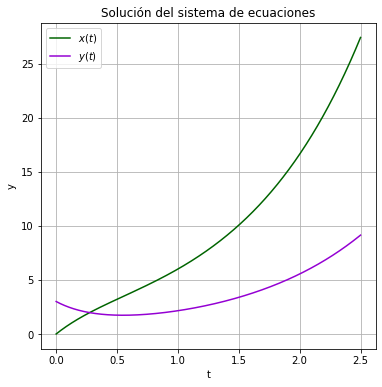

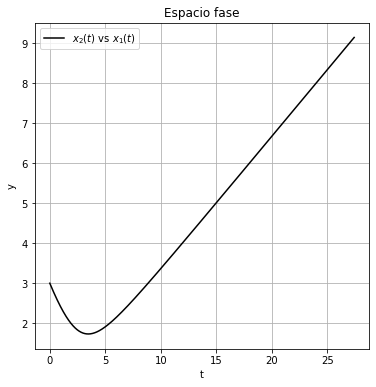

In [68]:
#Definimos la función 
def f(y, t):
  x_1, x_2 = y
  return [ 3*x_2,x_1-2*x_2]

#Condiciones iniciales
y_0=[0,3]
t=np.linspace(0,2.5,1000)
#Grafica de las soluciones
plt.figure(figsize=(6,6))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'darkgreen',label='$x(t)$')
plt.plot(t,y[0:,1],'darkviolet',label='$y(t)$')
plt.title('Solución del sistema de ecuaciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Espacio fase
plt.figure(figsize=(6,6))
y=odeint(f,y_0,t)
plt.plot(y[0:,0],y[0:,1],'k',label='$x_2(t)$ vs $x_1(t)$')
plt.title('Espacio fase')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


Ejercicio 9:

$$\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,-b,b) \\
A & = & \begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}
\end{eqnarray*}$$
Entonces, vectorialmente:

$$ \frac{d}{dt}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =\begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 2x_1 \\ -x_2 \\ 2x_2-3x_3 \end{pmatrix} $$

In [69]:
#Hacemos el arreglo 
A = np.array([[2,0,0],[0,-1,0],[0,2,-3]])
eigvalsA, eigvecsA= la.eig(A)
print("Los eigenvalores de A son:",eigvalsA )
trA = np.trace(A)
print("La traza de la matriz A es:",trA)

Los eigenvalores de A son: [ 2.+0.j -3.+0.j -1.+0.j]
La traza de la matriz A es: -2


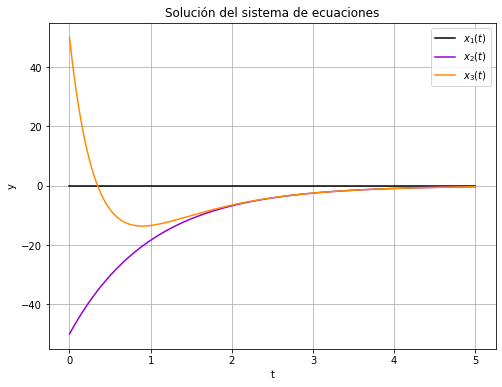

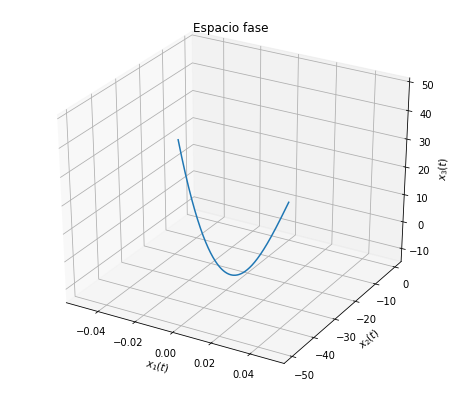

In [74]:
#Definimos la función 
def f(y, t):
  x_1, x_2, x_3 = y
  return [ 2*x_1 , -x_2 , 2*x_2-3*x_3 ]
#Condiciones iniciales
#Le damos un valor a b 
b = 50
y_0 = [0,-b,b]
t=np.linspace(0,5,900)

plt.figure(figsize=(8,6))
y=odeint(f,y_0,t)
plt.plot(t,y[0:,0],'black',label='$x_1(t)$')
plt.plot(t,y[0:,1],'darkviolet',label='$x_2(t)$')
plt.plot(t,y[0:,2],'darkorange',label='$x_3(t)$')
plt.title('Solución del sistema de ecuaciones')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Espacio fase
plt.figure(figsize=(8,7))
ax=plt.axes(projection='3d')
ax.plot3D(y[0:,0],y[0:,1],y[0:,2])
ax.set_title('Espacio fase')
ax.set_xlabel('$x_1(t)$')
ax.set_ylabel('$x_2(t)$')
ax.set_zlabel('$x_3(t)$')
plt.grid()
plt.show()

Ejercicio 10:

Se tiene el siguiente sistema de resortes acoplados con dos masas.\
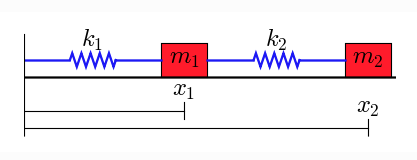
El sistema esta sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son $L_1$ y $L_2$.

Las ecuaciones de movimiento estan dadas por las siguientes ecuaciones diferenciales acopladas:

$$\begin{eqnarray*}
m_1 x_1^{''} + b_1 x_1^{'}+k_1 (x_1-L_1)-k_2(x_2-x_1-L_2) & = & 0 \\
m_2 x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-L_2) & = & 0 \\
\end{eqnarray*}$$
Encuentre las soluciones como funciones de $t$ y grafíquelas, así como las trayectorias en el espacio fase.

Suponga que $L_1=L_2=1$ y que las masas son iguales $m_1=m_2=1$.

10.1) Encuentre los eigenvalores del sistema y diga como son las soluciones.

In [90]:
b1 = 0.5 
k1 = 6
m1 = 1

b2 = 0.5 
k2 = 4
m2 = 1

A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 )/m1, -b1/m1, k2/m1, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2/m2, 0, -k2/m2, -b2/m2 ] ] )

print( "b1 = ", b1 )
print( "k1 = ", k1 )
print( "m1 = ", m1 )
print( " " )

print( "b2 = ", b2 )
print( "k2 = ", k2 )
print( "m2 = ", m2 )
print( " " )

print('La matriz A es:')
print(A)
print()

eigvals, eigvecs = la.eig( A )
print( 'Los eigenvalores son:')
print( eigvals )
print()
print( 'Los eigenvectores son:' )
print( eigvecs )

b1 =  0.5
k1 =  6
m1 =  1
 
b2 =  0.5
k2 =  4
m2 =  1
 
La matriz A es:
[[  0.    1.    0.    0. ]
 [-10.   -0.5   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.   -0.5]]

Los eigenvalores son:
[-0.25+3.45506874j -0.25-3.45506874j -0.25+1.39194109j -0.25-1.39194109j]

Los eigenvectores son:
[[-0.01790287-2.47422612e-01j -0.01790287+2.47422612e-01j
  -0.04564355-2.54132511e-01j -0.04564355+2.54132511e-01j]
 [ 0.85933785+0.00000000e+00j  0.85933785-0.00000000e+00j
   0.36514837+6.93889390e-17j  0.36514837-6.93889390e-17j]
 [ 0.00895144+1.23711306e-01j  0.00895144-1.23711306e-01j
  -0.09128709-5.08265023e-01j -0.09128709+5.08265023e-01j]
 [-0.42966892-8.32667268e-17j -0.42966892+8.32667268e-17j
   0.73029674+0.00000000e+00j  0.73029674-0.00000000e+00j]]


El punto crítico es estable por la parte real de los 4 eigenvalores son negativos.

**10.2**) Caso sin fricción. $b_1=b_2=0$, $k_1=6$, $k_2=4$, condiciones iniciales $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$

In [108]:
b1=b2=0
k1=6
k2=4
x0 = np.array([1,0,4,0])
#Definimos la matriz A
A = np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,-b2]])
#Calculamos los eigenvalores de la matriz
lambda1, lambda2, lambda3, lambda4 = linalg.eigvals(A)
#Imprimimos los eigenvalores
print('Eigenvalores:')
print('λ1: ', lambda1)
print('λ2: ', lambda2)
print('λ3: ', lambda3)
print('λ4: ', lambda4)

Eigenvalores:
λ1:  (-7.848128277522717e-18+3.4641016151377553j)
λ2:  (-7.848128277522717e-18-3.4641016151377553j)
λ3:  (3.5603703886533236e-17+1.4142135623730951j)
λ4:  (3.5603703886533236e-17-1.4142135623730951j)


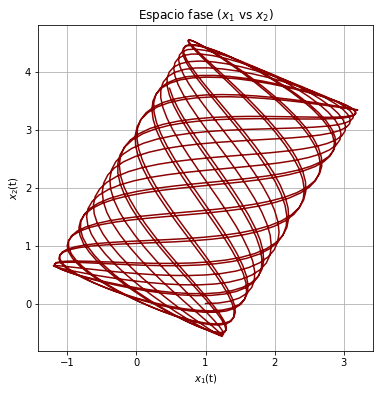

In [111]:
def f10(x0, t, k1, k2, b1, b2):
  x1, x2, x3, x4 = x0
  dxdt=[x3, x4, -(k1+k2)*x1+k2*x2-b1*x3+k1-k2, k2*x1-k2*x2-b2*x4+k2]
  return dxdt
t=np.linspace(0,50,1000)
X=odeint(f10,x0,t,args=(k1, k2, b1, b2))

# Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,0],X[:,1],color='darkred')
plt.title('Espacio fase ($x_1$ vs $x_2$)')
plt.xlabel('$x_1$(t)')
plt.ylabel('$x_2$(t)')
plt.grid()
plt.show()

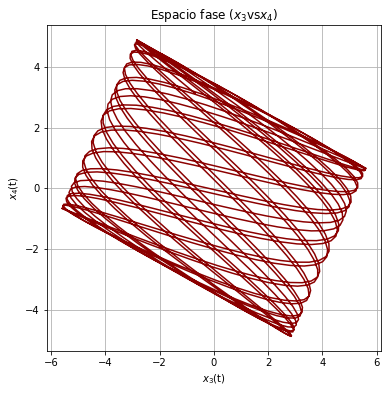

In [110]:
#Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,2],X[:,3],color='darkred')
plt.title('Espacio fase ($x_3$ vs $x_4$)')
plt.xlabel('$x_3$(t)')
plt.ylabel('$x_4$(t)')
plt.grid()
plt.show()

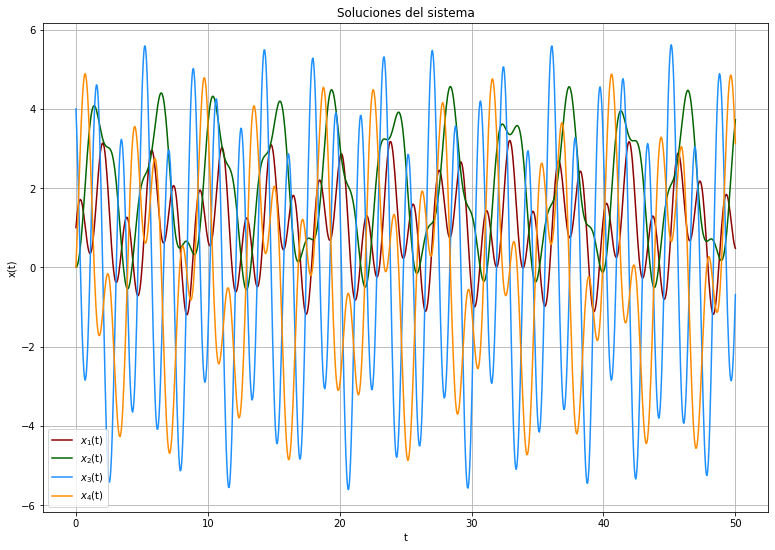

In [113]:
#Graficamos las soluciones del sistema
plt.figure(figsize=(13,9))
plt.plot(t,X[:,0],color='darkred',label='$x_1$(t)')
plt.plot(t,X[:,1],color='darkgreen',label='$x_2$(t)')
plt.plot(t,X[:,2],color='dodgerblue',label='$x_3$(t)')
plt.plot(t,X[:,3],color='darkorange',label='$x_4$(t)')
plt.title('Soluciones del sistema')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='best')
plt.show()

In [117]:
k1 = 6
b1 = 0

k2 = 4
b2 = 0

A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 ), -b1, k2, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2, 0, -k2,- b2 ] ] )

print('La matriz A es :')
print( A )
print()

B = np.array( [ [ 0 ], 
                [ 2 ], 
                [ 0 ], 
                [ 4 ] ] )

def dXdt(X,t=0):
  return np.array( [ X[ 1 ], 
                     -( k2 + k1 )*X[ 0 ] - b1*X[ 1 ] + k2*X[ 2 ] ,  
                     X[ 3 ],   
                     -k2*X[ 2 ] + k2*X[ 0 ] ] )


Xf0 = np.array( [ 0.0, 0.0, 0.0, 0.0  ] ) # Puntos criticos del sistema 
                                          # Usando matriz aumentada de gauss
X0 = np.array( [ 1.0, 0.0, 4.0, 0.0 ] )   # Condiciones iniciales

print( 'Puntos criticos del Sistema de Ecuaciones' )
print(  Xf0 ) 
print()

# Verifiquemos que la derivada sí se haga 0 en los puntos criticos

  # all( dXdt( Xf0 ) == np.zeros( 4 ) ) and all( dXdt( Xf1 ) == np.zeros( 4 ) )
all( dXdt( Xf0 ) == np.zeros( 4 ) ) # and all( dXdt( Xf1 ) == np.zeros( 4 ) )
print( " " )

# Definimos el Jacobiano

def d2Xdt2( X, t = 0 ):
  return np.array( [ [ 0, 1, 0, 0 ], 
                     [ -( k2 + k1 ), -b1, k2, 0 ], 
                     [ 0, 0, 0, 1 ],
                     [ k2, 0, -k2, 0 ] ] )

# Jacobiano evaluado en el punto critico
Af1 = d2Xdt2( Xf0 )
print( "Jacobiano evaluado en punto critico" )
print( Af1 )
print( " " )

λ1, λ2, λ3, λ4 = la.eigvals( Af1 )
print( "Eigenvalores del Jacobiano en X" ) # Todos tienen parte real e imaginaria
print( "λ1 = ", λ1 )
print( "λ2 = ", λ2 )
print( "λ3 = ", λ3 )
print( "λ4 = ", λ4 )

La matriz A es :
[[  0   1   0   0]
 [-10   0   4   0]
 [  0   0   0   1]
 [  4   0  -4   0]]

Puntos criticos del Sistema de Ecuaciones
[0. 0. 0. 0.]

 
Jacobiano evaluado en punto critico
[[  0   1   0   0]
 [-10   0   4   0]
 [  0   0   0   1]
 [  4   0  -4   0]]
 
Eigenvalores del Jacobiano en X
λ1 =  (2.220446049250313e-16+3.464101615137756j)
λ2 =  (2.220446049250313e-16-3.464101615137756j)
λ3 =  (-1.3877787807814457e-16+1.414213562373095j)
λ4 =  (-1.3877787807814457e-16-1.414213562373095j)


Periodo: 
1.813799364234217

[[1.]
 [0.]
 [2.]
 [0.]]


<Figure size 432x288 with 0 Axes>

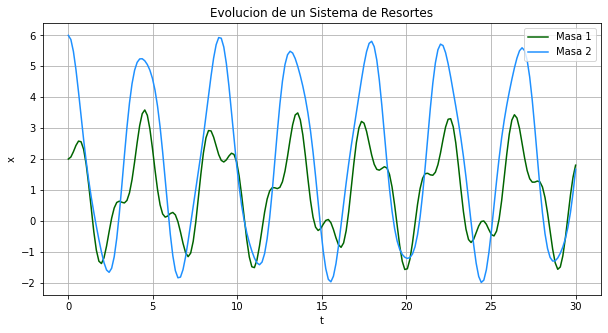

In [119]:
Tf1 = 2*np.pi/abs( λ1 ) 
print( 'Periodo: ' )
print( Tf1 )
print()

# Ahora busquemos la solucion

t = np.linspace( 0, 30, 200 )

X, infodict = odeint( dXdt, X0, t, full_output = True )
infodict[ "message" ]

B_sol = la.solve( A, -B )
print( B_sol )

x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( t, x1, "darkgreen", label = "Masa 1" );
plt.plot( t, x2, "dodgerblue", label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

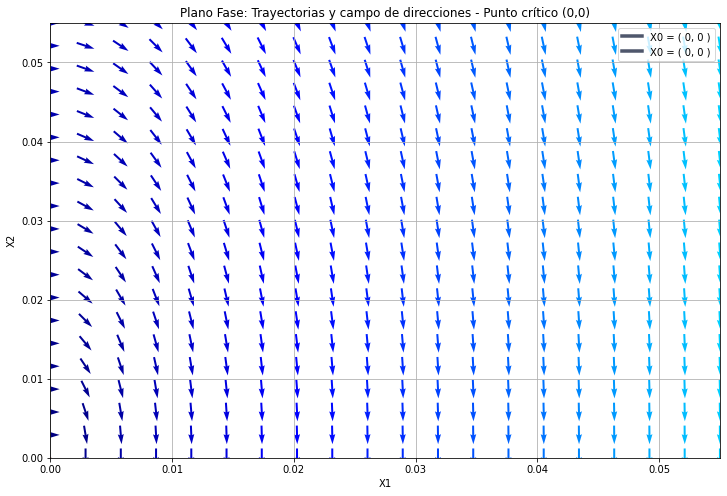

In [96]:
import numpy as np
from scipy import integrate, linalg
import pylab as plt
from matplotlib import cm

# Graficamos la familia de soluciones en el espacio fase para distintas condiciones iniciales

Vals = np.linspace( 1, 10, 1 ) # posición de X0 entre Xf0 y Xf1
Vcolors = plt.cm.cividis( np.linspace( 0.3, 1., len( Vals ) ) ) # colores para cada trayectoria
 
plt.figure( figsize = ( 12, 8 ) ); 

#-------------------------------------------------------------------------------

# grafica las trayectorias

for V, col in zip( Vals, Vcolors ):
    X0 = V * Xf0 # punto inicial
    X = odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 0 ], X[ :, 2 ], lw = 3.5*V, Color = col,
             label = "X0 = ( %.f, %.f )" % ( X0[ 0 ], X0[ 2 ] ) )
    
ymax = plt.ylim( ymin = 0 )[ 1 ] # get axis limits
xmax = plt.xlim( xmin = 0 )[ 1 ]

for V, col in zip( Vals, Vcolors ):
    X0 = V * Xf0 # punto inicial
    X = odeint( dXdt, X0, t )         
    # Integración para cada condición inicial
    plt.plot( X[ :,1 ], X[ :,3 ], lw =3.5*V, Color=col,
             label = "X0 = ( %.f, %.f )" % ( X0[ 1 ], X0[ 3 ] ) )

#-------------------------------------------------------------------------------

# Define una malla y calcula la pendiente (dirección) en cada punto

y2max = plt.ylim( ymin = 0 )[ 1 ]   
x2max = plt.xlim( xmin = 0 )[ 1 ] 
nb_points = 20

x = np.linspace( 0, xmax, nb_points )
y = np.linspace( 0, ymax, nb_points )
x2 = np.linspace( 0, x2max, nb_points )
y2 = np.linspace( 0, y2max, nb_points )

X1 ,Y1 = np.meshgrid( x, y )     
X2 ,Y2 = np.meshgrid( x2, y2 )                    # crea la malla
DX1, DY1, DX2, DY2 = dXdt( [ X1, Y1, X2, Y2 ] ) 
  # dX_df es una funcion # calcula la tasa de crecimiento
  # De 4 componentes necesito la de x1 y x2


M = ( np.hypot( DX1, DY1 ) ) # distancia euclideana 
M[ M == 0 ] = 1.             # Evita divisiones entre 0 
DX1 /= M                     # Normaliza el tamaño de cada flecha
DY1 /= M

#-------------------------------------------------------------------------------

# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# EL color de las flechas indica la rapidez de crecimiento

plt.title( "Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)" )
Q = plt.quiver( X1, Y1, DX1, DY1, M, pivot = "mid", cmap=plt.cm.jet )
plt.xlabel( "X1" )
plt.ylabel( "X2" )
plt.legend( loc = "best" )
plt.grid()

plt.xlim( 0, xmax )
plt.ylim( 0, ymax )
plt.show()

Periodo:  1.8139444972104801

[[1.]
 [0.]
 [2.]
 [0.]]


<Figure size 432x288 with 0 Axes>

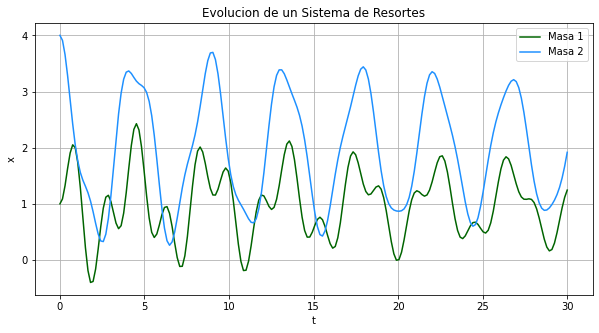

In [116]:
Tf1 = 2*np.pi/abs( λ1 ) 
print( 'Periodo: ', Tf1 )
print()

# Ahora busquemos la solucion

t = np.linspace( 0, 30, 200 )

X, infodict = odeint( dXdt, X0, t, full_output = True )
infodict[ "message" ]

B_sol = la.solve( A, -B )
print( B_sol )

x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( t, x1, 'darkgreen', label = 'Masa 1' );
plt.plot( t, x2, 'dodgerblue', label = 'Masa 2' );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( 't' );
plt.ylabel( 'x' );
plt.title( 'Evolucion de un Sistema de Resortes' );
plt.show();

10.3) Igual que el caso anterior pero, con fricción: $b_1=0.1, b_2=0.2$

In [123]:
k2=4
k1=6

b1=0.1
b2=0.2

A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 ), -b1, k2, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2, 0, -k2, -b2 ] ] )

print( 'La matriz A es:' )
print( A )
print()

B = np.array( [ [ 0 ],
                [ 2 ],
                [ 0 ],
                [ 4 ] ] )

def dXdt( X, t = 0 ):
  return np.array( [ X[ 1 ], -( k2 + k1 )*X[ 0 ] -b1*X[ 1 ] + k2*X[ 2 ],  
                   X[ 3 ], -k2*X[ 2 ] + k2*X[ 0 ] ] )
  
B_sol = la.solve( A, -B )
print( B_sol )


Xf0 = np.array( [ 0.0, 0.0, 0.0, 0.0 ] ) # Puntos criticos del sistema

# Usando matriz aumentada de gauss
# Condiciones iniciales
X0 = np.array( [ 0.0, 0.0, 2.0, 0.0 ] ) 
print( "Puntos criticos del Sistema de Ecuaciones" )
print( Xf0 )
print(  )

# all( dXdt( Xf0 ) == np.zeros( 4 ) ) and all( dXdt( Xf1 ) == np.zeros( 4 ) )
all( dXdt( Xf0 ) == np.zeros( 4 ) ) # and all( dXdt( Xf1 ) == np.zeros( 4 ) )

def d2Xdt2( X, t = 0 ):
  return np.array( [ [ 0, 1, 0, 0 ], 
                     [ -( k2 + k1 ), -b1, k2, 0 ], 
                     [ 0, 0, 0, 1],
                     [ k2, 0, -k2, 0 ] ] )
  
# Jacobiano evaluado en el punto critico
 
Af1 = d2Xdt2( Xf0 )
print( "Jacobiano evaluado en punto critico" )
print( Af1 )
print()

λ1, λ2, λ3, λ4 = la.eigvals( Af1 )
print( "Eigenvalores del Jacobiano en X" ) # Todos tienen parte real e imaginaria
print( "λ1 = ", λ1 )
print( "λ2 = ", λ2 )
print( "λ3 = ", λ3 )
print( "λ4 = ", λ4 )

La matriz A es:
[[  0.    1.    0.    0. ]
 [-10.   -0.1   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.   -0.2]]

[[1.]
 [0.]
 [2.]
 [0.]]
Puntos criticos del Sistema de Ecuaciones
[0. 0. 0. 0.]

Jacobiano evaluado en punto critico
[[  0.    1.    0.    0. ]
 [-10.   -0.1   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.    0. ]]

Eigenvalores del Jacobiano en X
λ1 =  (-0.03999936001028768+3.463593494852212j)
λ2 =  (-0.03999936001028768-3.463593494852212j)
λ3 =  (-0.010000639989712207+1.414291364612996j)
λ4 =  (-0.010000639989712207-1.414291364612996j)


Periodo: 
1.8139444972104801

[[1.]
 [0.]
 [2.]
 [0.]]


<Figure size 432x288 with 0 Axes>

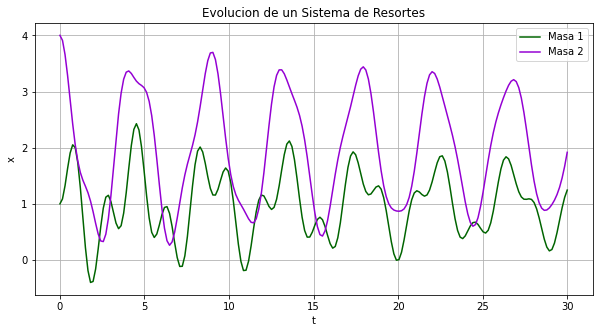

In [124]:
Tf1 = 2*np.pi/abs( λ1 ) 
print( 'Periodo: ')
print(Tf1 )
print()

# Ahora busquemos la solucion

t = np.linspace( 0, 30, 200 )

X, infodict = odeint( dXdt, X0, t, full_output = True )
infodict[ "message" ]

B_sol = la.solve( A, -B )
print( B_sol )

x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( t, x1, "darkgreen", label = "Masa 1" );
plt.plot( t, x2, "darkviolet", label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

<Figure size 432x288 with 0 Axes>

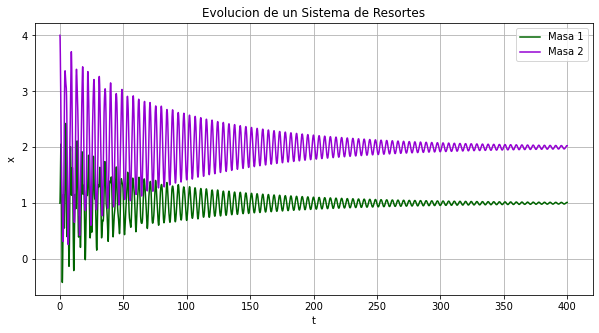

In [125]:
tr = np.linspace( 0, 400, 4000 )

X, infodict = integrate.odeint ( dXdt, X0, tr, full_output = True )
infodict[ "message" ]
x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( tr, x1, 'darkgreen', label = "Masa 1" );
plt.plot( tr, x2, 'darkviolet', label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

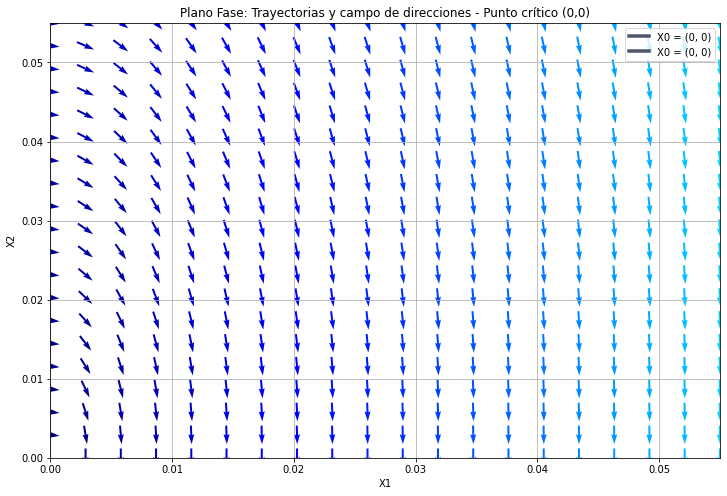

In [126]:
import numpy as np
from scipy import integrate, linalg
import pylab as plt
from matplotlib import cm

# Graficamos la familia de soluciones en el espacio fase para distintas condiciones iniciales

values  = np.linspace( 1, 10, 1 ) # posición de X0 entre X_f0 y X_f1
vcolors = plt.cm.cividis( np.linspace( 0.3, 1., len( values ) ) ) # colores para cada trayectoria
plt.figure(figsize=( 12, 8 ) ); 

#-------------------------------------------------------------------------------

# grafica las trayectorias

for v, col in zip( values, vcolors ):
    X0 = v * Xf0 # punto inicial
    X = integrate.odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 0 ], X[ :, 2 ], lw = 3.5*v, color = col,
             label = "X0 = (%.f, %.f)" % ( X0[ 0 ], X0[ 2 ] ) )
    
ymax = plt.ylim( ymin = 0 )[ 1 ] # get axis limits
xmax = plt.xlim( xmin = 0 )[ 1 ]

for v, col in zip( values, vcolors ):
    X0 = v * Xf0 # punto inicial
    X = integrate.odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 1 ], X[ :, 3 ], lw = 3.5*v, color = col,
             label = "X0 = (%.f, %.f)" % ( X0[ 1 ], X0[ 3 ]) )
    
#-------------------------------------------------------------------------------

# Define una malla y calcula la pendiente (dirección) en cada punto

y2max= plt.ylim( ymin = 0 )[ 1 ]   
x2max= plt.xlim( xmin = 0 )[ 1 ] 
nb_points = 20

x = np.linspace( 0, xmax, nb_points )
y = np.linspace( 0, ymax, nb_points )
x2 = np.linspace( 0, x2max, nb_points )
y2 = np.linspace( 0, y2max, nb_points )

X1 , Y1 = np.meshgrid( x, y )     
X2 , Y2 = np.meshgrid( x2, y2 )                # crea la malla
DX1, DY1, DX2, DY2 = dXdt( [ X1, Y1, X2, Y2 ]) 
# dX_df es una funcion                     # calcula la tasa de crecimiento
# De 4 componentes necesito la de x1 y x2

M = ( np.hypot( DX1, DY1 ) ) # distancia euclideana 
M[ M == 0] = 1.              # Evita divisiones entre 0 
DX1 /= M                     # Normaliza el tamaño de cada flecha
DY1 /= M

#-------------------------------------------------------------------------------

# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# EL color de las flechas indica la rapidez de crecimiento

plt.title( "Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)" )
Q = plt.quiver( X1, Y1, DX1, DY1, M, pivot="mid", cmap = plt.cm.jet )
plt.xlabel( "X1" )
plt.ylabel( "X2" )
plt.legend( loc = "best" )
plt.grid()

plt.xlim( 0, xmax )
plt.ylim( 0, ymax )
plt.show()

In [127]:
b1=0.1
b2=0.2
k1=6
k2=4
x0 = np.array([1,0,4,0])
#Definimos la matriz A
A = np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,-b2]])
#Calculamos los eigenvalores de la matriz
lambda1, lambda2, lambda3, lambda4 = linalg.eigvals(A)
#Imprimimos los eigenvalores
print('Eigenvalores:')
print('λ1: ', lambda1)
print('λ2: ', lambda2)
print('λ3: ', lambda3)
print('λ4: ', lambda4)

Eigenvalores:
λ1:  (-0.0599846540698995+3.463305356290167j)
λ2:  (-0.0599846540698995-3.463305356290167j)
λ3:  (-0.09001534593010038+1.411459149362342j)
λ4:  (-0.09001534593010038-1.411459149362342j)


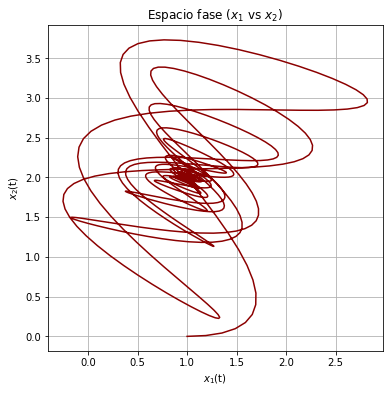

In [129]:
t=np.linspace(0,50,1000)
X=odeint(f10,x0,t,args=(k1, k2, b1, b2))

# Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,0],X[:,1],'darkred')
plt.title('Espacio fase ($x_1$ vs $x_2$)')
plt.xlabel('$x_1$(t)')
plt.ylabel('$x_2$(t)')
plt.grid()
plt.show()

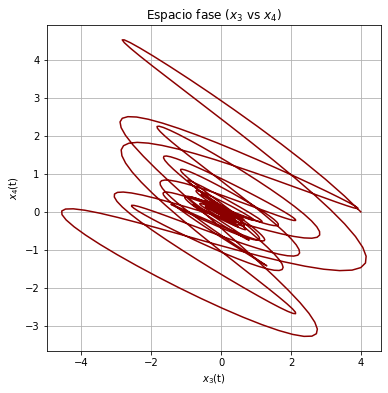

In [130]:
#Graficamos el espacio fase
plt.figure(figsize=(6,6))
plt.plot(X[:,2],X[:,3], 'darkred')
plt.title('Espacio fase ($x_3$ vs $x_4$)')
plt.xlabel('$x_3$(t)')
plt.ylabel('$x_4$(t)')
plt.grid()
plt.show()

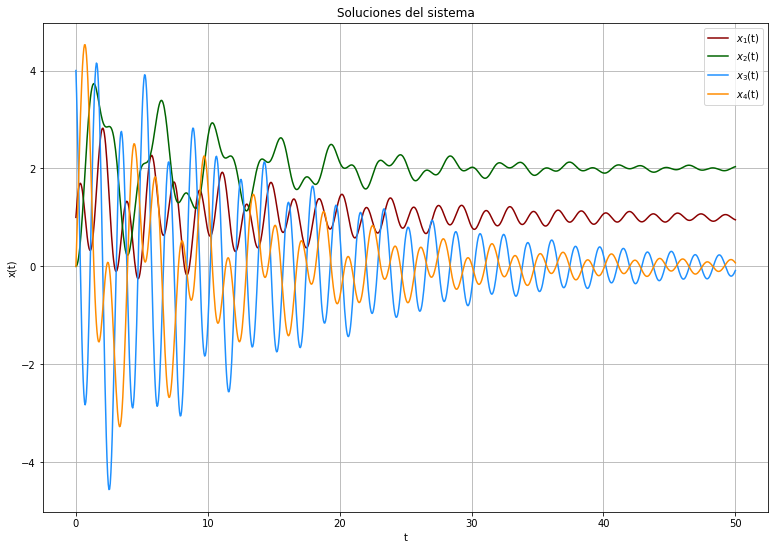

In [131]:
#Graficamos las soluciones del sistema
plt.figure(figsize=(13,9))
plt.plot(t,X[:,0],color='darkred',label='$x_1$(t)')
plt.plot(t,X[:,1],color='darkgreen',label='$x_2$(t)')
plt.plot(t,X[:,2],color='dodgerblue',label='$x_3$(t)')
plt.plot(t,X[:,3],color='darkorange',label='$x_4$(t)')
plt.title('Soluciones del sistema')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='best')
plt.show()